<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/classification/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [2]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

#Z score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

##Vettorizzare i label

In [0]:
word_index={'adenocarcinoma':0, 'large cell':1, 'squamous cell carcinoma':2}

In [0]:
#train_labels_dec = [word_index[label] for label in train_labels]

In [0]:
#test_labels_dec = [word_index[label] for label in test_labels]

In [16]:
#from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
#one_hot_train_labels = to_categorical(train_labels_dec)
#one_hot_test_labels = to_categorical(test_labels_dec)

#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train_data_stand, train_labels,
                                                    stratify=train_labels,
                                                    test_size=0.30,
                                                    random_state=3)

#PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=0.9, svd_solver='full')

In [23]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [0]:
train_data_stand_pca = pca.transform(X_train)
val_data_stand_pca = pca.transform(X_val)
test_data_stand_pca = pca.transform(test_data_stand)

In [25]:
train_data_stand_pca.shape

(131, 9)

#LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
lda = LinearDiscriminantAnalysis()

In [46]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [0]:
train_data_stand_lda = lda.transform(X_train)
val_data_stand_lda = lda.transform(X_val)
test_data_stand_lda = lda.transform(test_data_stand)

In [31]:
train_data_stand_lda.shape

(131, 2)

#Built classification algorithm: Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier


In [0]:
neigh = KNeighborsClassifier(n_neighbors=10)

###PCA

In [0]:
neigh.fit(train_data_stand_pca, y_train_pca)
neigh.score(val_data_stand_pca, y_val_pca)

0.45

In [0]:
neigh.score(test_data_stand_pca, test_labels_dec)

0.20588235294117646

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = neigh.predict(X_val_pca)

cm = confusion_matrix(y_val_pca, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_val_pca, y_pred)))

[[ 1  2  2]
 [ 0 12  7]
 [ 0 11  5]]
Accuracy0.45


###LDA

In [0]:
neigh.fit(X_train_lda, y_train_lda)
neigh.score(X_val_lda, y_val_lda)

0.975

In [0]:
neigh.score(test_data_stand_lda, test_labels_dec)

0.14705882352941177

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = neigh.predict(X_val_lda)

cm = confusion_matrix(y_val_lda, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_val_lda, y_pred)))

[[ 5  0  0]
 [ 0 19  0]
 [ 0  1 15]]
Accuracy0.975


#Built classification algorithm: SVM

In [0]:
from sklearn.svm import SVC

In [0]:
clf = SVC(gamma='auto')

###PCA

In [37]:
clf.fit(X_train_pca, y_train_pca)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
clf.score(X_val_pca, y_val_pca)

0.45

In [39]:
clf.score(test_data_stand_pca, test_labels_dec)

0.11764705882352941

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_val_pca)

cm = confusion_matrix(y_val_pca, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_val_pca, y_pred)))

ValueError: ignored

###LDA

In [54]:
clf.fit(X_train_lda, y_train_lda)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
clf.score(X_val_lda, y_val_lda)

0.95

In [75]:
clf.score(test_data_stand_lda, test_labels)

0.29411764705882354

In [0]:
y_pred

array(['large cell', 'squamous cell carcinoma', 'adenocarcinoma',
       'squamous cell carcinoma', 'squamous cell carcinoma',
       'squamous cell carcinoma', 'large cell', 'squamous cell carcinoma',
       'large cell', 'large cell', 'squamous cell carcinoma',
       'squamous cell carcinoma', 'squamous cell carcinoma', 'large cell',
       'large cell', 'large cell', 'squamous cell carcinoma',
       'adenocarcinoma', 'squamous cell carcinoma', 'adenocarcinoma',
       'adenocarcinoma', 'squamous cell carcinoma',
       'squamous cell carcinoma', 'large cell', 'squamous cell carcinoma',
       'large cell', 'large cell', 'large cell',
       'squamous cell carcinoma', 'large cell', 'squamous cell carcinoma',
       'large cell', 'large cell', 'large cell',
       'squamous cell carcinoma', 'large cell', 'large cell',
       'large cell', 'large cell', 'large cell'], dtype=object)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_val_lda)

cm = confusion_matrix(y_val_lda, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_val_lda, y_pred)))

[[ 4  0  1]
 [ 0 19  0]
 [ 0  1 15]]
Accuracy0.95


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 2 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


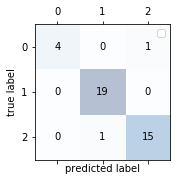

In [68]:
#matrice di confusione


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
            ax.text(x=j,  y=i, s=cm[i, j],  va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


Text(0.5, 1.0, 'Confusion matrix public dataset')

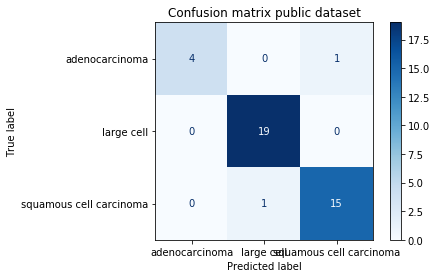

In [74]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf, X_val_lda, y_val_lda,
                                 display_labels=['adenocarcinoma', 'large cell', 'squamous cell carcinoma'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix public dataset')